In [1]:
import pandas as pd
from google.colab import files 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import plotly.express as px

import requests

### Loading clean dataset and basic info

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/modernpacifist/engineering-of-machine-learning-urfu/master/math-basics-of-machine-learning/Datasets/cars_moldova_clean.csv', delimiter=',')

In [3]:
df.head(10)

Make          Model  Year      Style  Distance  Engine_capacity(cm3)  \
0      Toyota          Prius  2011  Hatchback  195000.0                1800.0   
1     Renault   Grand Scenic  2014  Universal  135000.0                1500.0   
2     Renault         Laguna  2012  Universal  110000.0                1500.0   
3        Opel          Astra  2006  Universal  200000.0                1600.0   
4    Mercedes           Vito  2000   Microvan  300000.0                2200.0   
5  Volkswagen         Passat  2010  Universal  290000.0                1390.0   
6  Volkswagen        Touareg  2010        SUV  220000.0                2400.0   
7    Mercedes  Series (W124)  1991      Sedan  240000.0                2300.0   
8         BMW       5 Series  2004      Sedan  325000.0                 300.0   
9    Mercedes        E Class  2010      Sedan  210000.0                2200.0   

      Fuel_type Transmission  Price(euro)  Age       km_year  
0        Hybrid    Automatic       7750.0   11  17727.272727  
1        Diesel       Manual       8550.0    8  16875.000000  
2        Diesel       Manual       6550.0   10  11000.000000  
3  Metan/Propan       Manual       4100.0   16  12500.000000  
4        Diesel       Manual       3490.0   22  13636.363636  
5        Petrol       Manual       5600.0   12  24166.666667  
6        Diesel    Automatic      17000.0   12  18333.333333  
7        Petrol       Manual       2850.0   31   7741.935484  
8        Diesel       Manual       3400.0   18  18055.555556  
9        Diesel    Automatic      11400.0   12  17500.000000

In [4]:
df.sample(10)

Make     Model  Year      Style  Distance  Engine_capacity(cm3)  \
26061   Peugeot       206  2004  Hatchback  250000.0                1400.0   
20261     Volvo      XC90  2004        SUV  306650.0                2500.0   
8655        BMW  3 Series  2005  Universal  319000.0                1800.0   
5150       Audi        Q7  2008  Universal  280000.0                3000.0   
19617    Toyota   Corolla  2007      Sedan  250000.0                1400.0   
15115  Mercedes       GLE  2015  Crossover   70000.0                3000.0   
3940        BMW  5 Series  2015      Sedan  152724.0                3000.0   
6120   Mercedes      Rare  2017  Crossover  102487.0                3000.0   
7059     Toyota     Prius  2016  Hatchback  103000.0                1800.0   
12022       BMW  5 Series  2002      Sedan  346000.0                2500.0   

          Fuel_type Transmission  Price(euro)  Age       km_year  
26061        Diesel       Manual       1500.0   18  13888.888889  
20261  Metan/Propan    Automatic      10150.0   18  17036.111111  
8655         Petrol       Manual       3800.0   17  18764.705882  
5150         Diesel    Automatic      18900.0   14  20000.000000  
19617        Diesel       Manual       6200.0   15  16666.666667  
15115        Diesel    Automatic      43900.0    7  10000.000000  
3940         Diesel    Automatic      34999.0    7  21817.714286  
6120         Petrol    Automatic      52999.0    5  20497.400000  
7059         Hybrid    Automatic      13299.0    6  17166.666667  
12022        Diesel    Automatic       6550.0   20  17300.000000

In [5]:
df.describe()

Year        Distance  Engine_capacity(cm3)    Price(euro)  \
count  32220.000000    32220.000000          32220.000000   32220.000000   
mean    2008.293172   182513.687430           1868.610273    9454.779733   
std        7.189603    96805.552427            609.781322    9519.612235   
min     1971.000000      100.000000            200.000000     200.000000   
25%     2005.000000   123000.000000           1500.000000    3599.000000   
50%     2010.000000   180000.000000           1800.000000    6730.500000   
75%     2014.000000   237000.000000           2000.000000   12000.000000   
max     2021.000000  1000000.000000           5000.000000  100000.000000   

                Age       km_year  
count  32220.000000  32220.000000  
mean      13.706828  14954.229373  
std        7.189603   7337.012277  
min        1.000000    100.000000  
25%        8.000000  10271.827206  
50%       12.000000  14461.538462  
75%       17.000000  18888.888889  
max       51.000000  50000.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  object 
 1   Model                 32220 non-null  object 
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  object 
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  object 
 7   Transmission          32220 non-null  object 
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.7+ MB


# 1. Visualization via pandas (numeric types)

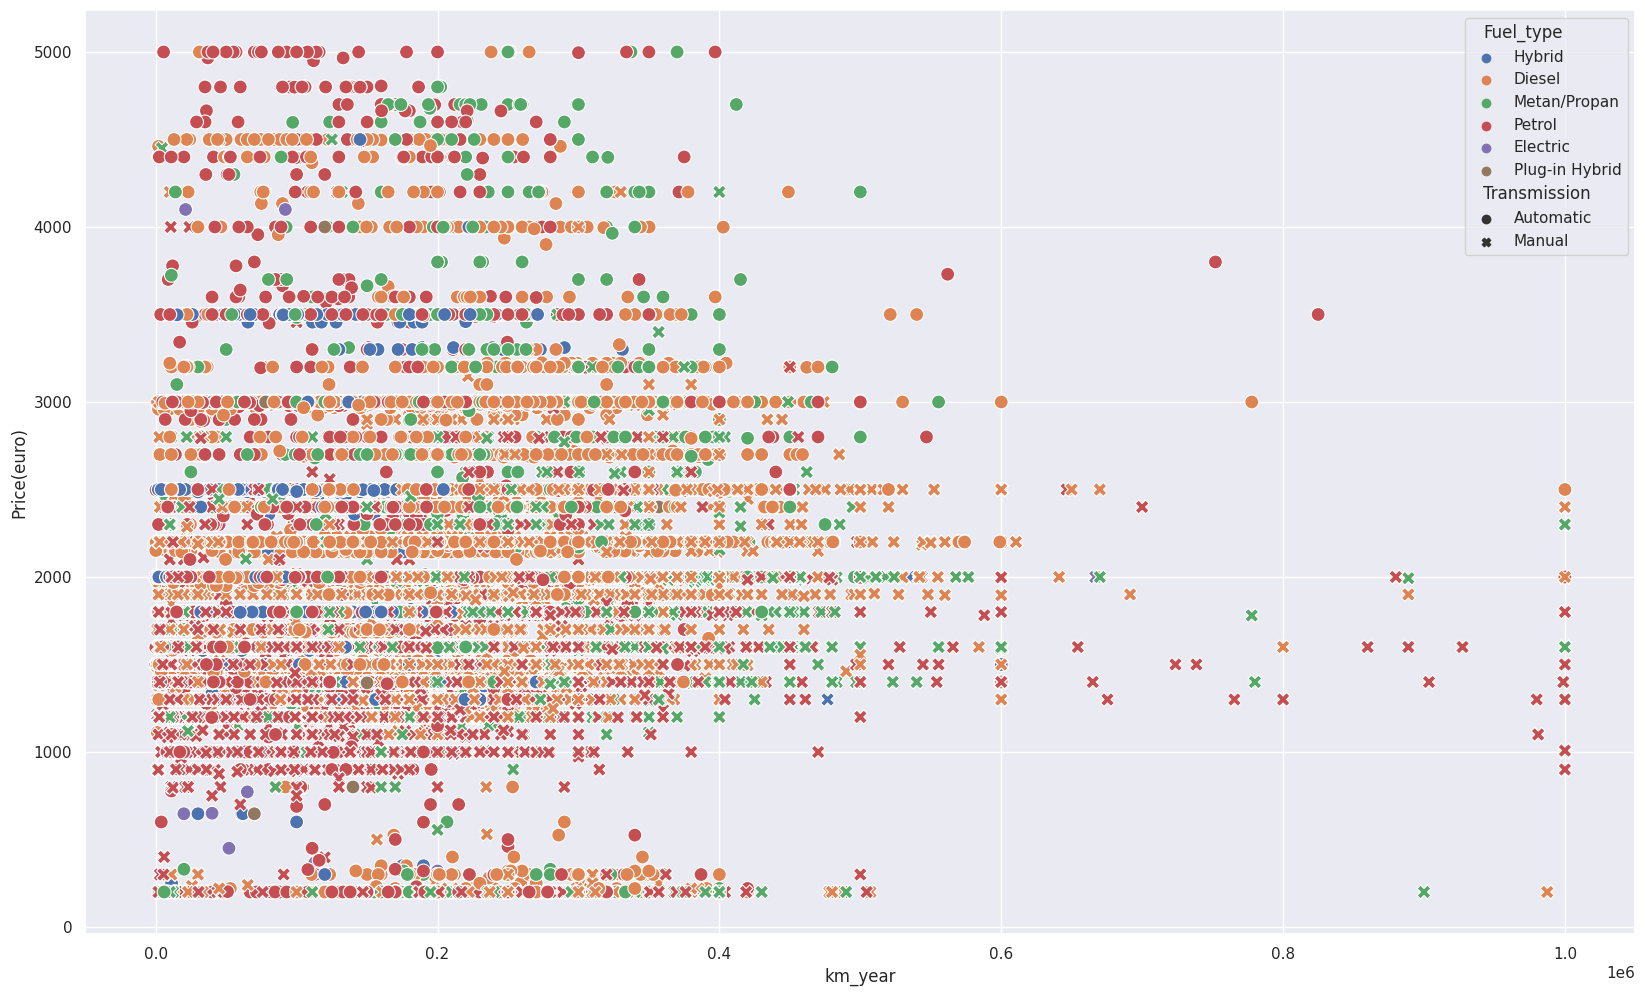

In [7]:
fig = plt.figure(figsize=(20, 12))

scatterplot = sns.scatterplot( data=df, x='Distance', y='Engine_capacity(cm3)', style='Transmission', hue='Fuel_type', s=100, sizes=(50, 200))
scatterplot.set_xlabel('km_year')
scatterplot.set_ylabel('Price(euro)')

plt.show()

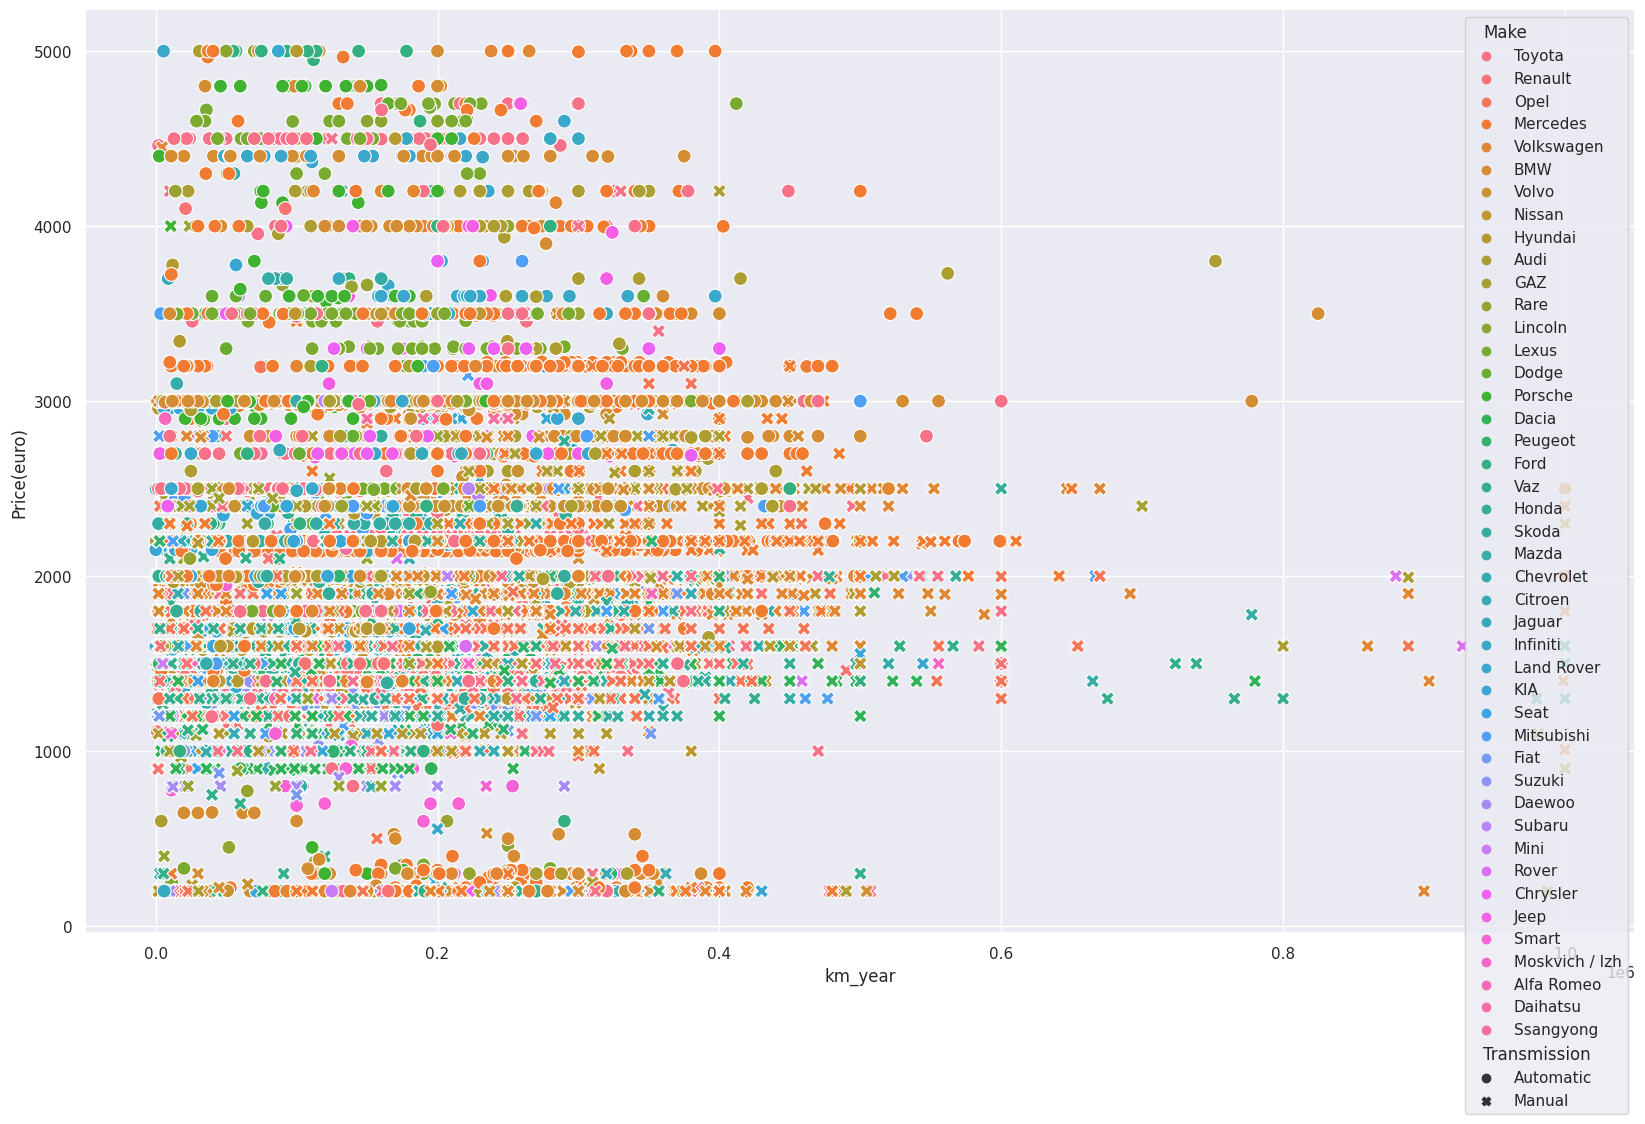

In [8]:
fig = plt.figure(figsize=(20, 12))

scatterplot = sns.scatterplot( data=df, x='Distance', y='Engine_capacity(cm3)', style='Transmission', hue='Make', s=100, sizes=(50, 200))
scatterplot.set_xlabel('km_year')
scatterplot.set_ylabel('Price(euro)')

plt.show()

In [9]:
def draw_pie(dataframe, col_name):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_axes((1, 1, 1, 1))

    ft = dataframe[col_name].value_counts().sort_values(ascending=False)

    pie = ax.pie(ft, autopct='%1.1f%%', startangle=90, textprops={'color': 'w'})
    ax.set_title(col_name, fontsize=16)
    plt.legend(ft.index, loc='best')

    plt.show()

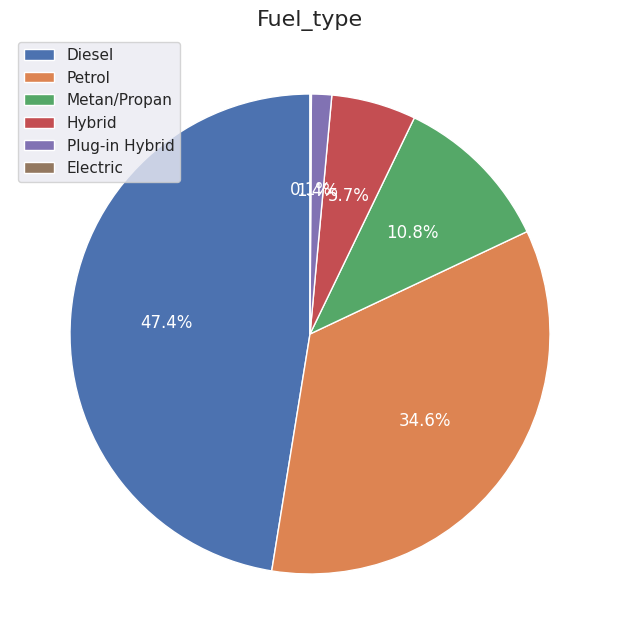

In [10]:
draw_pie(df, 'Fuel_type')

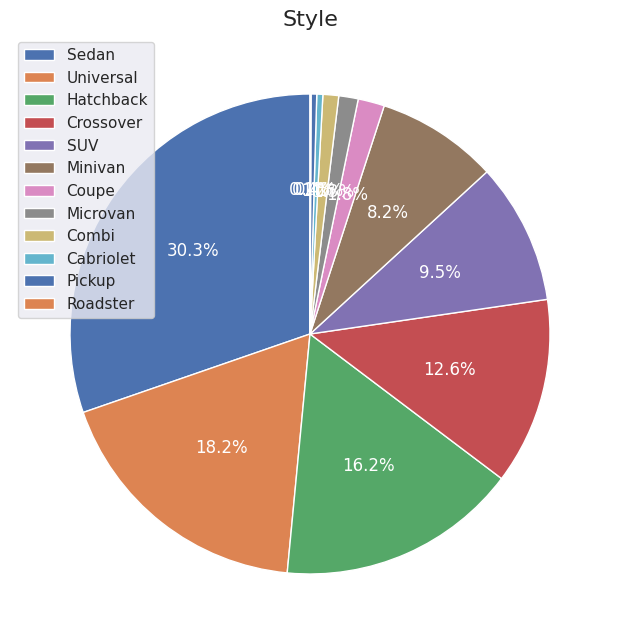

In [11]:
draw_pie(df, 'Style')

<Axes: xlabel='Transmission', ylabel='count'>

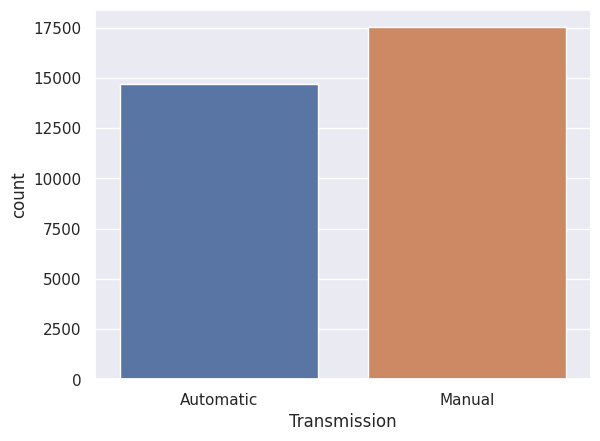

In [12]:
sns.countplot(data=df, x='Transmission')

<Axes: xlabel='Transmission', ylabel='Price(euro)'>

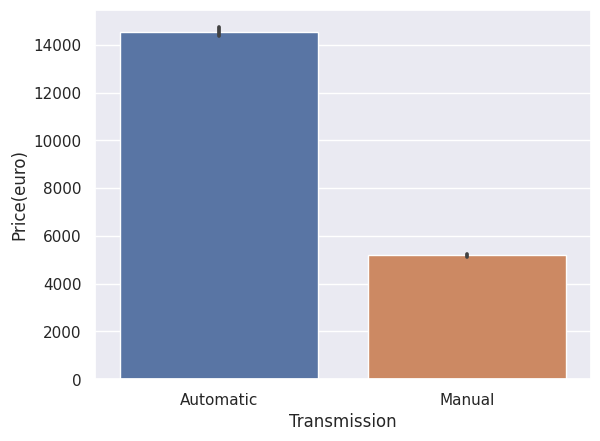

In [13]:
sns.barplot(data=df, x='Transmission', y='Price(euro)')

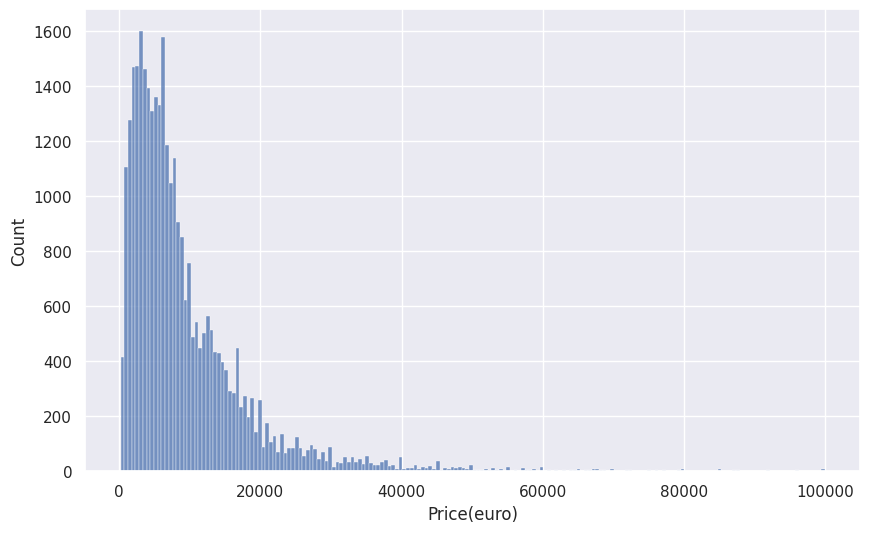

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price(euro)')
plt.show()

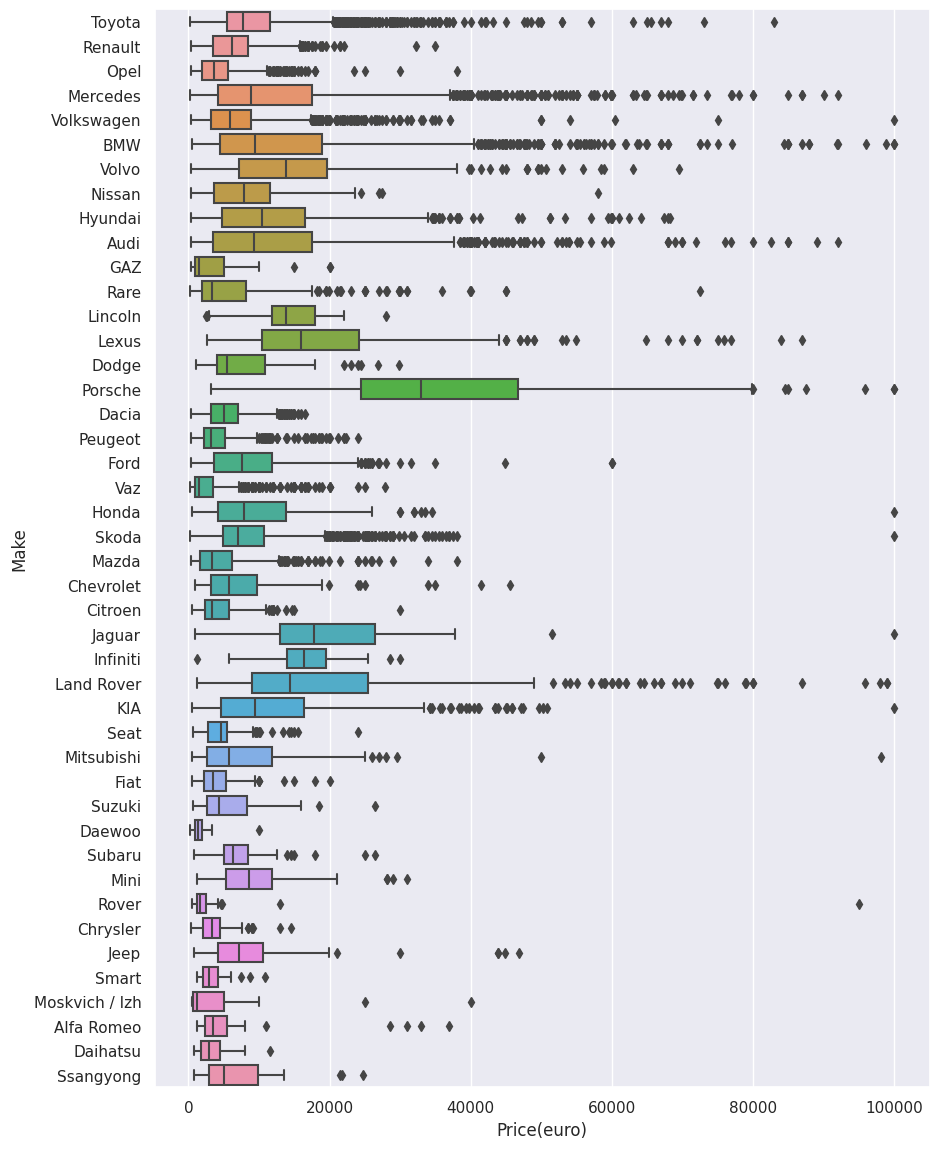

In [15]:
plt.figure(figsize=(10, 14))
sns.boxplot(data=df, x='Price(euro)', y='Make')
plt.show()

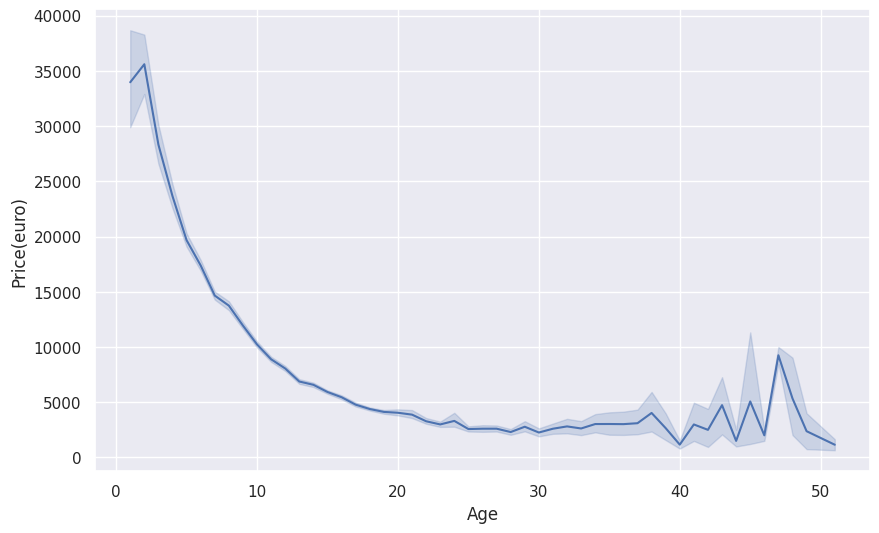

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Age', y='Price(euro)')
plt.show()

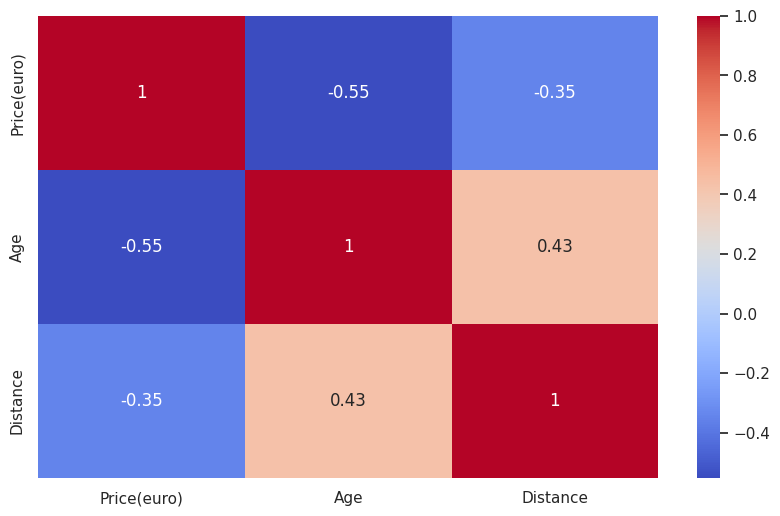

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Price(euro)', 'Age', 'Distance']].corr(), annot=True, cmap='coolwarm')
plt.show()

# 2. Feature engineering

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  object 
 1   Model                 32220 non-null  object 
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  object 
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  object 
 7   Transmission          32220 non-null  object 
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.7+ MB


## 2.1 Average price by Make

In [19]:
df['AveragePrice'] = df.groupby('Make')['Price(euro)'].transform('mean')

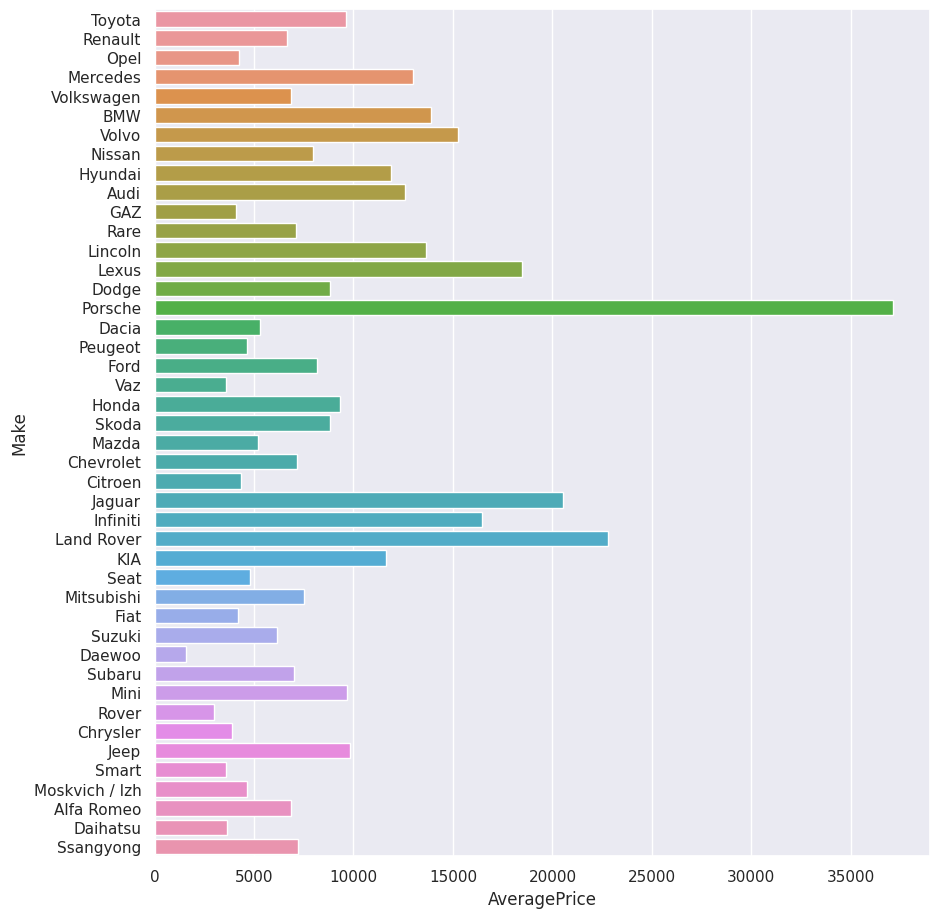

In [20]:
plt.figure(figsize=(10, 11))
sns.barplot(data=df, x='AveragePrice', y='Make')
plt.show()

## 2.2 Mean engine capacity by Make

In [21]:
df['MeanEngineCapacity'] = df.groupby('Make')['Engine_capacity(cm3)'].transform('mean')

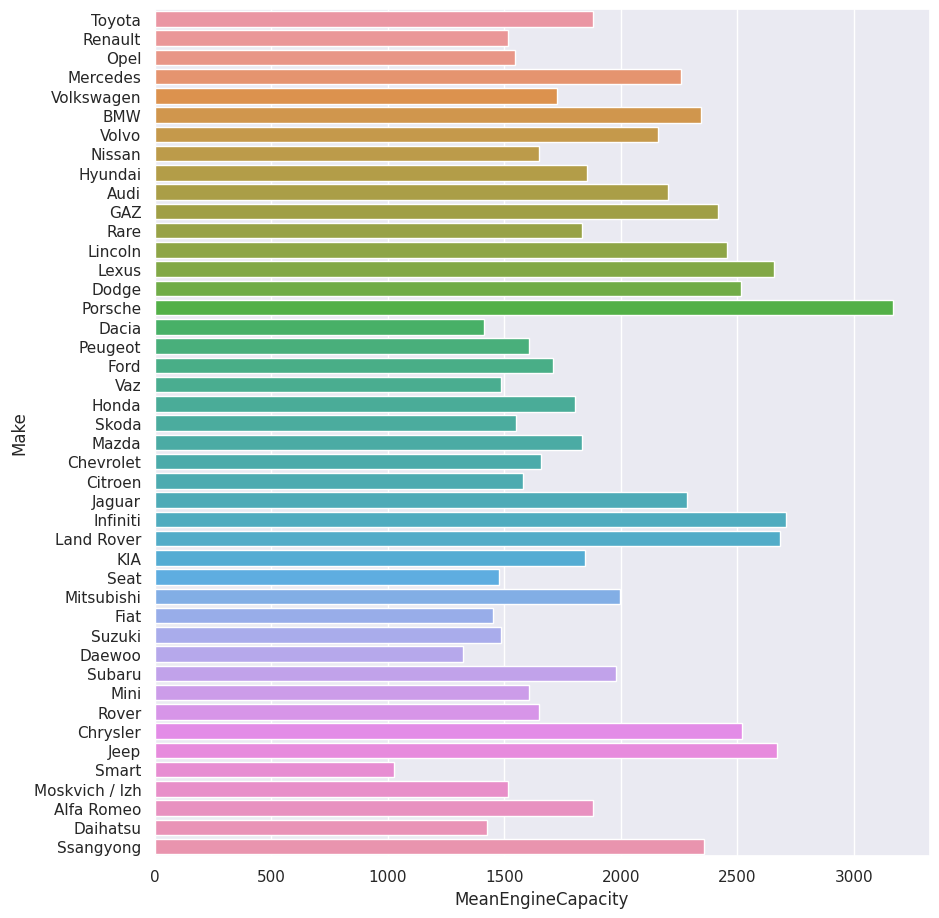

In [22]:
plt.figure(figsize=(10, 11))
sns.barplot(data=df, x='MeanEngineCapacity', y='Make')
plt.show()

## 2.3 Fuel efficiency by Make

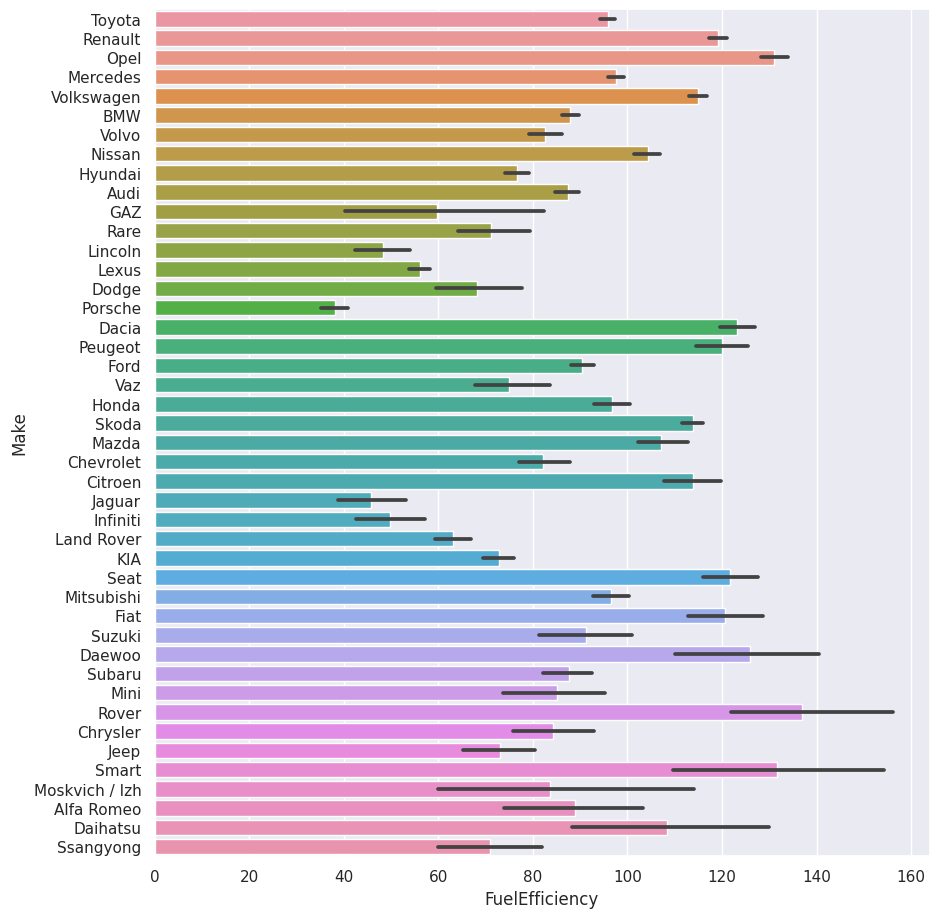

In [23]:
plt.figure(figsize=(10, 11))
df['FuelEfficiency'] = df['Distance'] / df['MeanEngineCapacity']
sns.barplot(data=df, x='FuelEfficiency', y='Make')
plt.show()

## 2.4 Average price to engine volume

In [24]:
df['EngineVolumeBins'] = pd.cut(df['Engine_capacity(cm3)'], bins=7, labels=['500', '1000', '1500', '2000', '2500', '3000', '3500'])

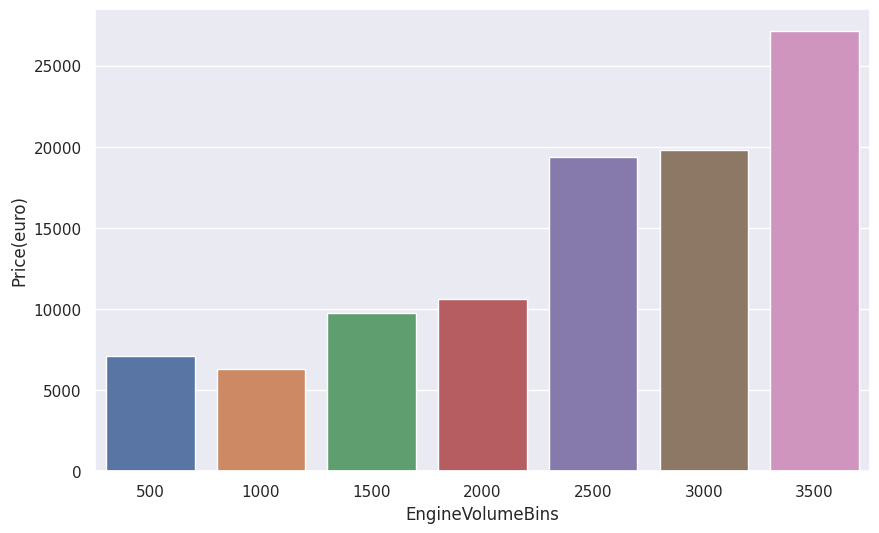

In [25]:
plt.figure(figsize=(10, 6))
avg_price_by_engine_volume = df.groupby('EngineVolumeBins')['Price(euro)'].mean().reset_index()
sns.barplot(x='EngineVolumeBins', y='Price(euro)', data=avg_price_by_engine_volume)
plt.show()

## 2.5 EngineVolumeBins

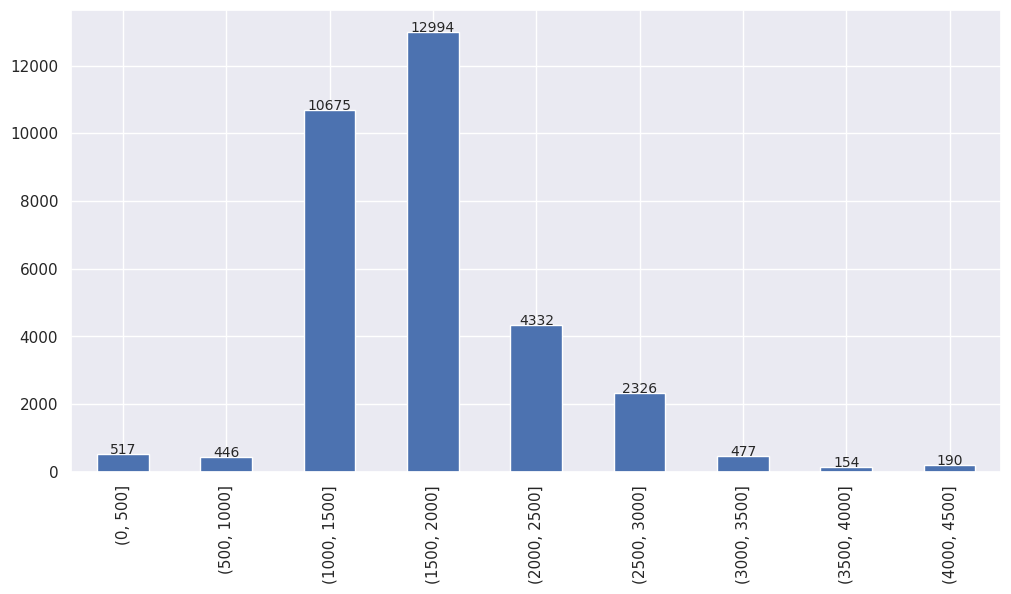

In [26]:
plt.figure(figsize=(12, 6))

bins = list(range(0, 5000, 500))

df['EngineVolumeBins'] = pd.cut(df['Engine_capacity(cm3)'], bins=bins)
counts = df['EngineVolumeBins'].value_counts().sort_index()
ax = counts.plot(kind='bar')
for i, v in enumerate(counts):
     ax.text(i, v + 2, str(v), ha='center', fontsize=10)

## 2.6 Quantile km_year

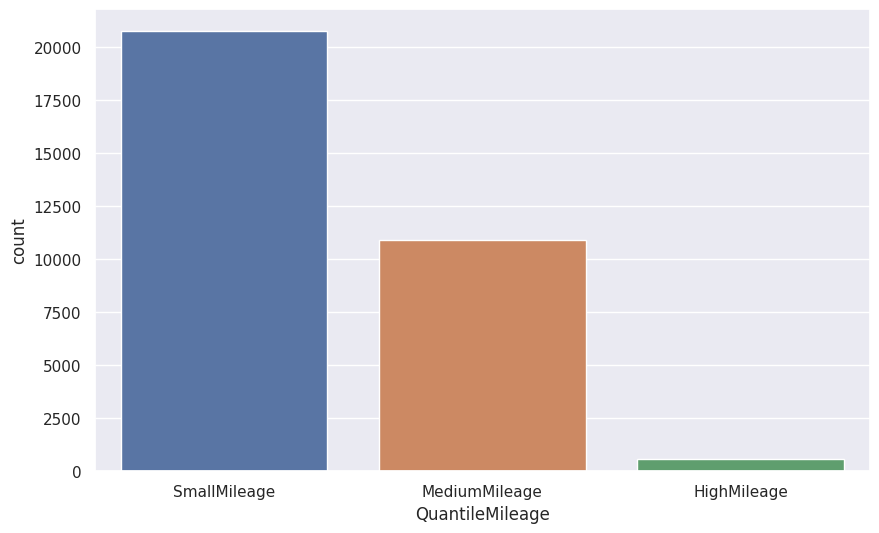

In [27]:
plt.figure(figsize=(10, 6))
df['QuantileMileage'] = pd.cut(df['km_year'], bins=3, labels=['SmallMileage', 'MediumMileage', 'HighMileage'])
sns.countplot(data=df, x='QuantileMileage')
plt.show()

# 3. Data pre-processing

## 3.1 data standardization

In [28]:
df.describe()

Year        Distance  Engine_capacity(cm3)    Price(euro)  \
count  32220.000000    32220.000000          32220.000000   32220.000000   
mean    2008.293172   182513.687430           1868.610273    9454.779733   
std        7.189603    96805.552427            609.781322    9519.612235   
min     1971.000000      100.000000            200.000000     200.000000   
25%     2005.000000   123000.000000           1500.000000    3599.000000   
50%     2010.000000   180000.000000           1800.000000    6730.500000   
75%     2014.000000   237000.000000           2000.000000   12000.000000   
max     2021.000000  1000000.000000           5000.000000  100000.000000   

                Age       km_year  AveragePrice  MeanEngineCapacity  \
count  32220.000000  32220.000000  32220.000000        32220.000000   
mean      13.706828  14954.229373   9454.779733         1868.610273   
std        7.189603   7337.012277   4254.240759          340.522615   
min        1.000000    100.000000   1598.841270         1028.303030   
25%        8.000000  10271.827206   6875.368421         1550.711561   
50%       12.000000  14461.538462   8831.359538         1801.312430   
75%       17.000000  18888.888889  12590.721216         2202.274903   
max       51.000000  50000.000000  37094.994737         3165.305263   

       FuelEfficiency  
count    32220.000000  
mean       100.103777  
std         54.472699  
min          0.054133  
25%         65.333793  
50%         99.337206  
75%        130.431870  
max        672.953279

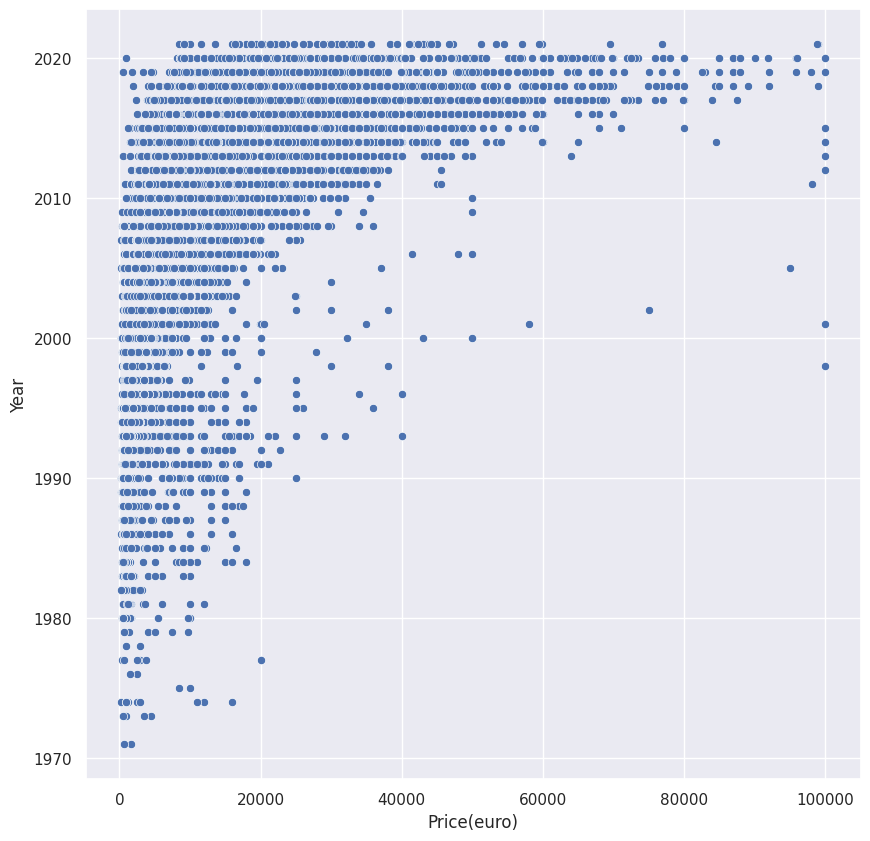

In [29]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Price(euro)', y='Year')
plt.show()

In [30]:
df_std = df.copy()

<Axes: xlabel='Distance', ylabel='Count'>

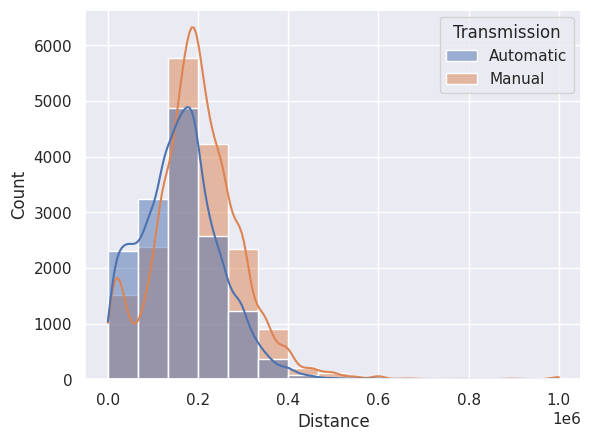

In [31]:
sns.histplot(data=df_std, x='Distance', hue='Transmission', bins=15, kde=True)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
STD_SCALER = StandardScaler()

In [34]:
numerical_columns = list(df_std.describe().columns)
display(numerical_columns)

['Year',
 'Distance',
 'Engine_capacity(cm3)',
 'Price(euro)',
 'Age',
 'km_year',
 'AveragePrice',
 'MeanEngineCapacity',
 'FuelEfficiency']

In [35]:
standardized_data = STD_SCALER.fit_transform(df_std[numerical_columns])

In [36]:
df_standardized = pd.DataFrame(standardized_data, columns=numerical_columns)
df_std.loc[:, numerical_columns] = df_standardized.loc[:, numerical_columns]

In [37]:
df_std.head()

Make         Model      Year      Style  Distance  \
0    Toyota         Prius  0.376498  Hatchback  0.128985   
1   Renault  Grand Scenic  0.793774  Universal -0.490823   
2   Renault        Laguna  0.515590  Universal -0.749077   
3      Opel         Astra -0.318962  Universal  0.180636   
4  Mercedes          Vito -1.153513   Microvan  1.213651   

   Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)       Age  \
0             -0.112518        Hybrid    Automatic    -0.179084 -0.376498   
1             -0.604505        Diesel       Manual    -0.095045 -0.793774   
2             -0.604505        Diesel       Manual    -0.305141 -0.515590   
3             -0.440509  Metan/Propan       Manual    -0.562509  0.318962   
4              0.543465        Diesel       Manual    -0.626588  1.153513   

    km_year  AveragePrice  MeanEngineCapacity  FuelEfficiency  \
0  0.377959      0.039644            0.028677        0.068097   
1  0.261796     -0.653284           -1.030426       -0.204790   
2 -0.538951     -0.653284           -1.030426       -0.507184   
3 -0.334505     -1.230036           -0.946752        0.536856   
4 -0.179622      0.836183            1.137507        0.603574   

  EngineVolumeBins QuantileMileage  
0     (1500, 2000]   MediumMileage  
1     (1000, 1500]   MediumMileage  
2     (1000, 1500]    SmallMileage  
3     (1500, 2000]    SmallMileage  
4     (2000, 2500]    SmallMileage

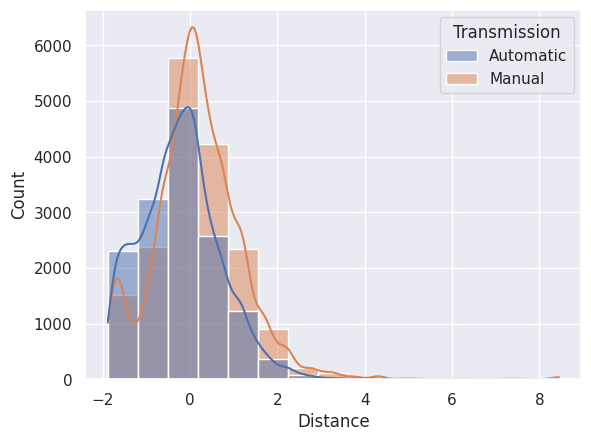

In [38]:
sns.histplot(data=df_std, x='Distance', hue='Transmission', bins=15, kde=True)
plt.show()

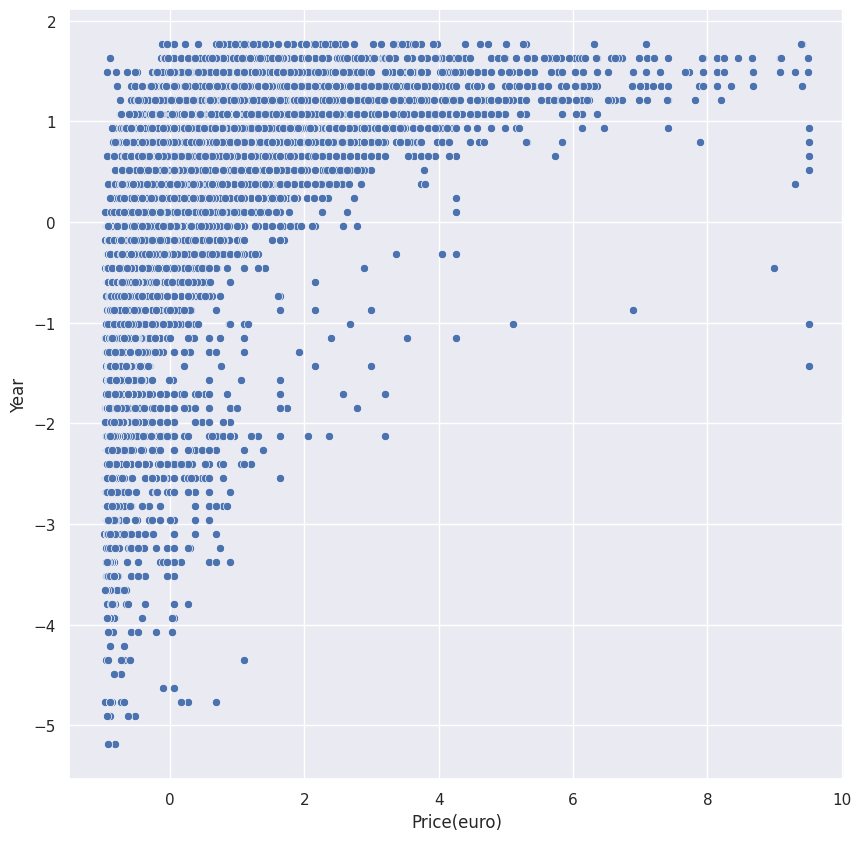

In [39]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_std, x='Price(euro)', y='Year')
plt.show()

##### save df_std

In [40]:
df_std.to_csv('cars_moldova_std.csv')

## 3.2 data normalization

In [41]:
df_norm = df.copy()

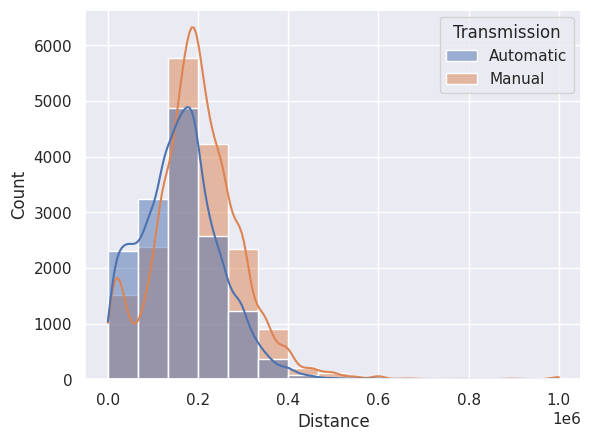

In [42]:
sns.histplot(data=df_norm, x='Distance', hue='Transmission', bins=15, kde=True)
plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
MinMaxSCALER = MinMaxScaler()

In [45]:
normalized_data = MinMaxSCALER.fit_transform(df_norm[numerical_columns])

In [46]:
df_normalized = pd.DataFrame(normalized_data, columns=numerical_columns)
df_norm.loc[:, numerical_columns] = df_normalized.loc[:, numerical_columns]

In [47]:
df_norm.head()

Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0    Toyota         Prius  0.80  Hatchback  0.194919              0.333333   
1   Renault  Grand Scenic  0.86  Universal  0.134913              0.270833   
2   Renault        Laguna  0.82  Universal  0.109911              0.270833   
3      Opel         Astra  0.70  Universal  0.199920              0.291667   
4  Mercedes          Vito  0.58   Microvan  0.299930              0.416667   

      Fuel_type Transmission  Price(euro)   Age   km_year  AveragePrice  \
0        Hybrid    Automatic     0.075651  0.20  0.353252      0.226069   
1        Diesel       Manual     0.083667  0.14  0.336172      0.143023   
2        Diesel       Manual     0.063627  0.18  0.218437      0.143023   
3  Metan/Propan       Manual     0.039078  0.30  0.248497      0.073900   
4        Diesel       Manual     0.032966  0.42  0.271270      0.321534   

   MeanEngineCapacity  FuelEfficiency EngineVolumeBins QuantileMileage  
0            0.397787        0.154197     (1500, 2000]   MediumMileage  
1            0.229026        0.132107     (1000, 1500]   MediumMileage  
2            0.229026        0.107627     (1000, 1500]    SmallMileage  
3            0.242359        0.192143     (1500, 2000]    SmallMileage  
4            0.574472        0.197544     (2000, 2500]    SmallMileage

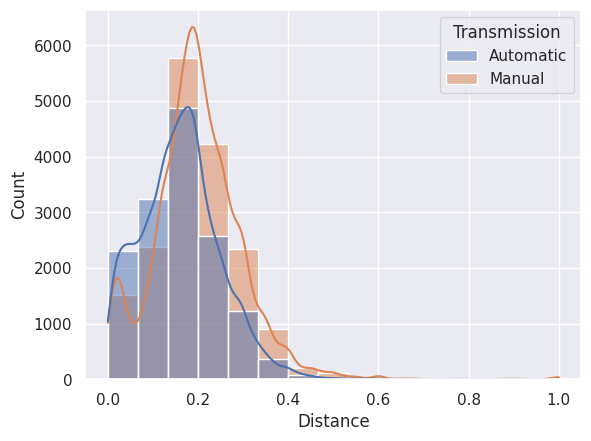

In [48]:
sns.histplot(data=df_norm, x='Distance', hue='Transmission', bins=15, kde=True)
plt.show()

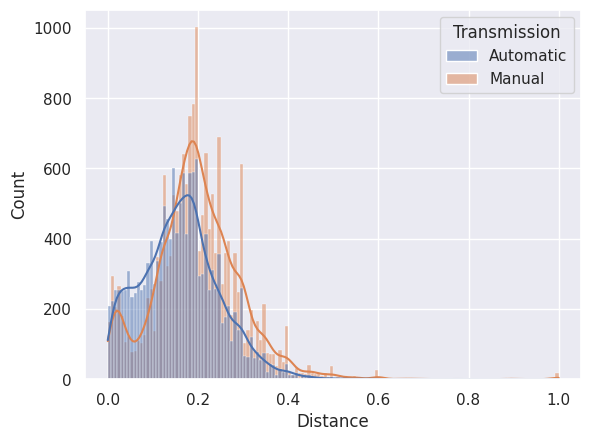

In [49]:
sns.histplot(data=df_norm, x='Distance', hue='Transmission', kde=True)
plt.show()

In [50]:
df_norm.to_csv('cars_moldova_norm.csv')

## 3.3 Power transform

In [51]:
df_power = df.copy()

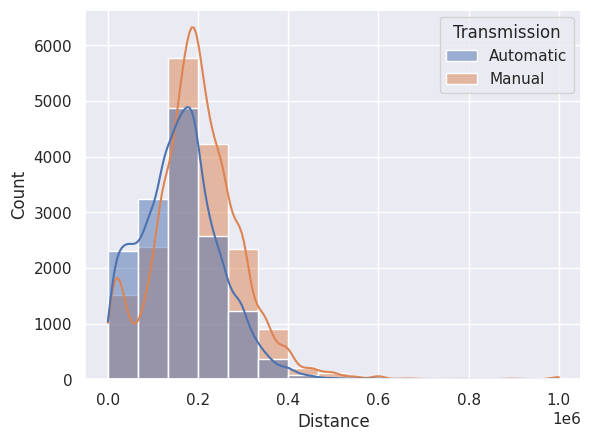

In [52]:
sns.histplot(data=df_power, x='Distance', hue='Transmission', bins=15, kde=True)
plt.show()

In [53]:
from sklearn.preprocessing import PowerTransformer

In [54]:
transformer = PowerTransformer(method='yeo-johnson')

In [55]:
df_power[numerical_columns] = transformer.fit_transform(df_power[numerical_columns])

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [56]:
df_power.head()

Make         Model      Year      Style  Distance  \
0    Toyota         Prius  0.327662  Hatchback  0.217261   
1   Renault  Grand Scenic  0.813202  Universal -0.405939   
2   Renault        Laguna  0.485847  Universal -0.690936   
3      Opel         Astra -0.411481  Universal  0.266196   
4  Mercedes          Vito -1.194159   Microvan  1.176785   

   Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)       Age  \
0             -0.053463        Hybrid    Automatic     0.172205 -0.221611   
1             -0.572027        Diesel       Manual     0.283284 -0.762648   
2             -0.572027        Diesel       Manual    -0.015972 -0.389239   
3             -0.395265  Metan/Propan       Manual    -0.526691  0.485860   
4              0.590892        Diesel       Manual    -0.697867  1.150039   

    km_year  AveragePrice  MeanEngineCapacity  FuelEfficiency  \
0  0.434484      0.241176            0.226141        0.166414   
1  0.325778     -0.615194           -1.162331       -0.102726   
2 -0.471755     -0.615194           -1.162331       -0.419449   
3 -0.258811     -1.661818           -1.026513        0.600164   
4 -0.102179      0.961771            1.165109        0.659436   

  EngineVolumeBins QuantileMileage  
0     (1500, 2000]   MediumMileage  
1     (1000, 1500]   MediumMileage  
2     (1000, 1500]    SmallMileage  
3     (1500, 2000]    SmallMileage  
4     (2000, 2500]    SmallMileage

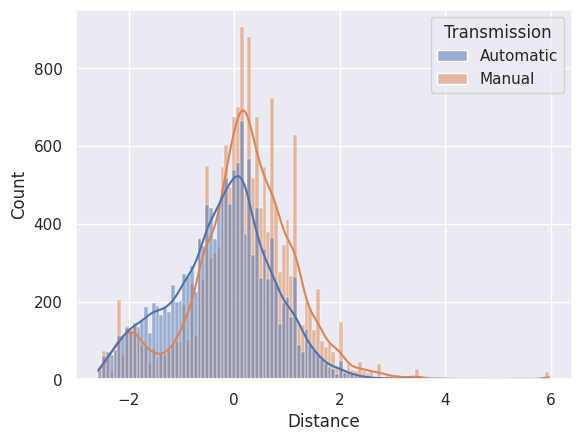

In [57]:
sns.histplot(data=df_power, x='Distance', hue='Transmission', kde=True)
plt.show()

In [58]:
df_power.to_csv('cars_moldova_power.csv')

## 3.4 One-hot encoding

In [59]:
df_onehot = df.copy()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Make                  32220 non-null  object  
 1   Model                 32220 non-null  object  
 2   Year                  32220 non-null  int64   
 3   Style                 32220 non-null  object  
 4   Distance              32220 non-null  float64 
 5   Engine_capacity(cm3)  32220 non-null  float64 
 6   Fuel_type             32220 non-null  object  
 7   Transmission          32220 non-null  object  
 8   Price(euro)           32220 non-null  float64 
 9   Age                   32220 non-null  int64   
 10  km_year               32220 non-null  float64 
 11  AveragePrice          32220 non-null  float64 
 12  MeanEngineCapacity    32220 non-null  float64 
 13  FuelEfficiency        32220 non-null  float64 
 14  EngineVolumeBins      32111 non-null  category
 15  Qu

In [61]:
df_onehot = df_onehot.select_dtypes(include=['object'])

In [62]:
categorial_columns = list(df_onehot.columns)

In [63]:
df_onehot[categorial_columns] = df_onehot[categorial_columns].astype('category')

In [64]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
enc = OneHotEncoder(handle_unknown='ignore')

In [66]:
enc.fit(df_onehot)

OneHotEncoder(handle_unknown='ignore')

In [67]:
df_onehot.head()

Make         Model      Style     Fuel_type Transmission
0    Toyota         Prius  Hatchback        Hybrid    Automatic
1   Renault  Grand Scenic  Universal        Diesel       Manual
2   Renault        Laguna  Universal        Diesel       Manual
3      Opel         Astra  Universal  Metan/Propan       Manual
4  Mercedes          Vito   Microvan        Diesel       Manual

In [68]:
encoded_data = enc.fit_transform(df_onehot[categorial_columns])

In [69]:
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=enc.get_feature_names_out())

In [70]:
encoded_df.head(10)

Make_Alfa Romeo  Make_Audi  Make_BMW  Make_Chevrolet  Make_Chrysler  \
0              0.0        0.0       0.0             0.0            0.0   
1              0.0        0.0       0.0             0.0            0.0   
2              0.0        0.0       0.0             0.0            0.0   
3              0.0        0.0       0.0             0.0            0.0   
4              0.0        0.0       0.0             0.0            0.0   
5              0.0        0.0       0.0             0.0            0.0   
6              0.0        0.0       0.0             0.0            0.0   
7              0.0        0.0       0.0             0.0            0.0   
8              0.0        0.0       1.0             0.0            0.0   
9              0.0        0.0       0.0             0.0            0.0   

   Make_Citroen  Make_Dacia  Make_Daewoo  Make_Daihatsu  Make_Dodge  ...  \
0           0.0         0.0          0.0            0.0         0.0  ...   
1           0.0         0.0          0.0            0.0         0.0  ...   
2           0.0         0.0          0.0            0.0         0.0  ...   
3           0.0         0.0          0.0            0.0         0.0  ...   
4           0.0         0.0          0.0            0.0         0.0  ...   
5           0.0         0.0          0.0            0.0         0.0  ...   
6           0.0         0.0          0.0            0.0         0.0  ...   
7           0.0         0.0          0.0            0.0         0.0  ...   
8           0.0         0.0          0.0            0.0         0.0  ...   
9           0.0         0.0          0.0            0.0         0.0  ...   

   Style_Sedan  Style_Universal  Fuel_type_Diesel  Fuel_type_Electric  \
0          0.0              0.0               0.0                 0.0   
1          0.0              1.0               1.0                 0.0   
2          0.0              1.0               1.0                 0.0   
3          0.0              1.0               0.0                 0.0   
4          0.0              0.0               1.0                 0.0   
5          0.0              1.0               0.0                 0.0   
6          0.0              0.0               1.0                 0.0   
7          1.0              0.0               0.0                 0.0   
8          1.0              0.0               1.0                 0.0   
9          1.0              0.0               1.0                 0.0   

   Fuel_type_Hybrid  Fuel_type_Metan/Propan  Fuel_type_Petrol  \
0               1.0                     0.0               0.0   
1               0.0                     0.0               0.0   
2               0.0                     0.0               0.0   
3               0.0                     1.0               0.0   
4               0.0                     0.0               0.0   
5               0.0                     0.0               1.0   
6               0.0                     0.0               0.0   
7               0.0                     0.0               1.0   
8               0.0                     0.0               0.0   
9               0.0                     0.0               0.0   

   Fuel_type_Plug-in Hybrid  Transmission_Automatic  Transmission_Manual  
0                       0.0                     1.0                  0.0  
1                       0.0                     0.0                  1.0  
2                       0.0                     0.0                  1.0  
3                       0.0                     0.0                  1.0  
4                       0.0                     0.0                  1.0  
5                       0.0                     0.0                  1.0  
6                       0.0                     1.0                  0.0  
7                       0.0                     0.0                  1.0  
8                       0.0                     0.0                  1.0  
9                       0.0                     1.0                  0.0  

[10 r

In [71]:
encoded_df.shape

(32220, 200)

In [72]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Columns: 200 entries, Make_Alfa Romeo to Transmission_Manual
dtypes: float64(200)
memory usage: 49.2 MB


In [73]:
encoded_df.columns

Index(['Make_Alfa Romeo', 'Make_Audi', 'Make_BMW', 'Make_Chevrolet',
       'Make_Chrysler', 'Make_Citroen', 'Make_Dacia', 'Make_Daewoo',
       'Make_Daihatsu', 'Make_Dodge',
       ...
       'Style_Sedan', 'Style_Universal', 'Fuel_type_Diesel',
       'Fuel_type_Electric', 'Fuel_type_Hybrid', 'Fuel_type_Metan/Propan',
       'Fuel_type_Petrol', 'Fuel_type_Plug-in Hybrid',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object', length=200)

In [74]:
encoded_df.to_csv('cars_moldova_one_hot_encoded.csv')

## 3.5 Ordinal encoding

In [75]:
df_ordinal = df.copy()

In [76]:
df_ordinal.head()

Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0    Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1   Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2   Renault        Laguna  2012  Universal  110000.0                1500.0   
3      Opel         Astra  2006  Universal  200000.0                1600.0   
4  Mercedes          Vito  2000   Microvan  300000.0                2200.0   

      Fuel_type Transmission  Price(euro)  Age       km_year  AveragePrice  \
0        Hybrid    Automatic       7750.0   11  17727.272727   9623.430749   
1        Diesel       Manual       8550.0    8  16875.000000   6675.596334   
2        Diesel       Manual       6550.0   10  11000.000000   6675.596334   
3  Metan/Propan       Manual       4100.0   16  12500.000000   4221.990680   
4        Diesel       Manual       3490.0   22  13636.363636  13012.050083   

   MeanEngineCapacity  FuelEfficiency EngineVolumeBins QuantileMileage  
0         1878.375284      103.813121     (1500, 2000]   MediumMileage  
1         1517.732310       88.948492     (1000, 1500]   MediumMileage  
2         1517.732310       72.476549     (1000, 1500]    SmallMileage  
3         1546.224781      129.347300     (1500, 2000]    SmallMileage  
4         2255.951244      132.981597     (2000, 2500]    SmallMileage

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Make                  32220 non-null  object  
 1   Model                 32220 non-null  object  
 2   Year                  32220 non-null  int64   
 3   Style                 32220 non-null  object  
 4   Distance              32220 non-null  float64 
 5   Engine_capacity(cm3)  32220 non-null  float64 
 6   Fuel_type             32220 non-null  object  
 7   Transmission          32220 non-null  object  
 8   Price(euro)           32220 non-null  float64 
 9   Age                   32220 non-null  int64   
 10  km_year               32220 non-null  float64 
 11  AveragePrice          32220 non-null  float64 
 12  MeanEngineCapacity    32220 non-null  float64 
 13  FuelEfficiency        32220 non-null  float64 
 14  EngineVolumeBins      32111 non-null  category
 15  Qu

In [78]:
df_ordinal = df_ordinal.select_dtypes(include=['object'])

In [79]:
categorial_columns = list(df_ordinal.columns)

In [80]:
categorial_columns

['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']

In [81]:
df_ordinal[categorial_columns] = df_ordinal[categorial_columns].astype('category')

In [82]:
df_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Make          32220 non-null  category
 1   Model         32220 non-null  category
 2   Style         32220 non-null  category
 3   Fuel_type     32220 non-null  category
 4   Transmission  32220 non-null  category
dtypes: category(5)
memory usage: 196.2 KB


In [83]:
from sklearn.preprocessing import OrdinalEncoder

In [84]:
encoder = OrdinalEncoder()

In [85]:
df_ordinal[categorial_columns] = encoder.fit_transform(df_ordinal[categorial_columns])

In [86]:
df_ordinal.head(10)

Make  Model  Style  Fuel_type  Transmission
0  40.0   92.0    4.0        2.0           0.0
1  32.0   62.0   11.0        0.0           1.0
2  32.0   71.0   11.0        0.0           1.0
3  28.0   23.0   11.0        3.0           1.0
4  23.0  126.0    5.0        0.0           1.0
5  42.0   88.0   11.0        4.0           1.0
6  42.0  117.0    9.0        0.0           0.0
7  23.0  109.0   10.0        4.0           1.0
8   2.0    9.0   10.0        0.0           1.0
9  23.0   48.0   10.0        0.0           0.0

In [87]:
df_temp = df.copy()

In [88]:
df_temp.shape

(32220, 16)

In [89]:
df_temp.head()

Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0    Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1   Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2   Renault        Laguna  2012  Universal  110000.0                1500.0   
3      Opel         Astra  2006  Universal  200000.0                1600.0   
4  Mercedes          Vito  2000   Microvan  300000.0                2200.0   

      Fuel_type Transmission  Price(euro)  Age       km_year  AveragePrice  \
0        Hybrid    Automatic       7750.0   11  17727.272727   9623.430749   
1        Diesel       Manual       8550.0    8  16875.000000   6675.596334   
2        Diesel       Manual       6550.0   10  11000.000000   6675.596334   
3  Metan/Propan       Manual       4100.0   16  12500.000000   4221.990680   
4        Diesel       Manual       3490.0   22  13636.363636  13012.050083   

   MeanEngineCapacity  FuelEfficiency EngineVolumeBins QuantileMileage  
0         1878.375284      103.813121     (1500, 2000]   MediumMileage  
1         1517.732310       88.948492     (1000, 1500]   MediumMileage  
2         1517.732310       72.476549     (1000, 1500]    SmallMileage  
3         1546.224781      129.347300     (1500, 2000]    SmallMileage  
4         2255.951244      132.981597     (2000, 2500]    SmallMileage

In [90]:
df_temp[categorial_columns] = df_ordinal[categorial_columns]

In [91]:
df_temp.head()

Make  Model  Year  Style  Distance  Engine_capacity(cm3)  Fuel_type  \
0  40.0   92.0  2011    4.0  195000.0                1800.0        2.0   
1  32.0   62.0  2014   11.0  135000.0                1500.0        0.0   
2  32.0   71.0  2012   11.0  110000.0                1500.0        0.0   
3  28.0   23.0  2006   11.0  200000.0                1600.0        3.0   
4  23.0  126.0  2000    5.0  300000.0                2200.0        0.0   

   Transmission  Price(euro)  Age       km_year  AveragePrice  \
0           0.0       7750.0   11  17727.272727   9623.430749   
1           1.0       8550.0    8  16875.000000   6675.596334   
2           1.0       6550.0   10  11000.000000   6675.596334   
3           1.0       4100.0   16  12500.000000   4221.990680   
4           1.0       3490.0   22  13636.363636  13012.050083   

   MeanEngineCapacity  FuelEfficiency EngineVolumeBins QuantileMileage  
0         1878.375284      103.813121     (1500, 2000]   MediumMileage  
1         1517.732310       88.948492     (1000, 1500]   MediumMileage  
2         1517.732310       72.476549     (1000, 1500]    SmallMileage  
3         1546.224781      129.347300     (1500, 2000]    SmallMileage  
4         2255.951244      132.981597     (2000, 2500]    SmallMileage

In [92]:
df_temp.to_csv('cars_moldova_ordinal.csv')